## Project Description:
Food delivery is a courier service in which a restaurant, store, or independent food-delivery company delivers food to a customer. An order is typically made either through a restaurant or grocer's website or mobile app, or through a food ordering company. The delivered items can include entrees, sides, drinks, desserts, or grocery items and are typically delivered in boxes or bags. The delivery person will normally drive a car, but in bigger cities where homes and restaurants are closer together, they may use bikes or motorized scooters.


### 1. Import libraries and data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


### 2. Analyze data

In [5]:
df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

There is one notice is that although the data in general is not having the missing value, which is NaN usually but I just observed and identify the NaN is treated as string or object. Therefore, the data info is not trully reliable

So I will observe it one by one

### Looks like all the features are not in the approriate datatype
I will begin to convert it into their correct datatype

In [7]:
df.select_dtypes('O').columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken(min)'],
      dtype='object')

In [10]:
df[df['Delivery_person_Age'] == np.nan]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

### df[df['Delivery_person_Age'] == 'NaN ']
> I noticed the missing value has space so that's why I could not filter it out

In [36]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [31]:
df['Delivery_person_Age'] = df['Delivery_person_Age'].replace('NaN ', np.nan, regex=True)

In [37]:
df[df['Delivery_person_Ratings'] == 'NaN ']

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
42,0x4f0,MUMRES17DEL02,NaN,NaN,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,18:35:00,conditions Cloudy,Medium,1,Drinks,scooter,1,No,Metropolitian,(min) 33
74,0xa9f,BANGRES13DEL01,NaN,NaN,12.935662,77.614130,12.975662,77.654130,11-03-2022,NaN,15:30:00,conditions NaN,NaN,1,Drinks,scooter,0,No,Metropolitian,(min) 19
120,0x6e2,VADRES06DEL01,NaN,NaN,22.312790,73.170283,22.422790,73.280283,02-04-2022,NaN,18:25:00,conditions NaN,NaN,3,Snack,electric_scooter,0,No,Metropolitian,(min) 25
127,0xd0e5,KOLRES17DEL03,23,NaN,22.569358,88.433452,22.599358,88.463452,17-02-2022,23:25:00,23:35:00,conditions Sunny,Low,0,Drinks,motorcycle,0,No,Metropolitian,(min) 15
140,0x1ec7,PUNERES05DEL03,NaN,NaN,18.543626,73.905101,18.573626,73.935101,09-03-2022,NaN,23:40:00,conditions Stormy,Low,2,Snack,scooter,0,No,NaN,(min) 19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45508,0x426b,HYDRES06DEL01,NaN,NaN,17.455894,78.375467,17.525894,78.445467,23-03-2022,17:55:00,18:00:00,conditions Fog,Medium,0,Meal,motorcycle,1,No,Urban,(min) 36
45518,0x863,INDORES05DEL01,NaN,NaN,22.727021,75.884167,22.737021,75.894167,19-03-2022,NaN,11:40:00,conditions NaN,NaN,3,Snack,electric_scooter,0,No,Metropolitian,(min) 25
45519,0xd0be,AGRRES07DEL01,NaN,NaN,27.160934,78.044095,27.170934,78.054095,13-02-2022,NaN,09:05:00,conditions NaN,NaN,3,Meal,electric_scooter,1,No,Urban,(min) 17
45526,0x1ed1,JAPRES18DEL01,NaN,NaN,26.913987,75.752891,27.023987,75.862891,27-03-2022,20:35:00,20:45:00,conditions Cloudy,Jam,2,Snack,scooter,0,No,Metropolitian,(min) 48


In [38]:
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].replace('NaN ', np.nan, regex=True)

In [50]:
df[df['Time_Orderd'] == 'NaN '] 

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
42,0x4f0,MUMRES17DEL02,NaN,NaN,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,18:35:00,conditions Cloudy,Medium,1,Drinks,scooter,1,No,Metropolitian,(min) 33
74,0xa9f,BANGRES13DEL01,NaN,NaN,12.935662,77.614130,12.975662,77.654130,11-03-2022,NaN,15:30:00,conditions NaN,NaN,1,Drinks,scooter,0,No,Metropolitian,(min) 19
120,0x6e2,VADRES06DEL01,NaN,NaN,22.312790,73.170283,22.422790,73.280283,02-04-2022,NaN,18:25:00,conditions NaN,NaN,3,Snack,electric_scooter,0,No,Metropolitian,(min) 25
140,0x1ec7,PUNERES05DEL03,NaN,NaN,18.543626,73.905101,18.573626,73.935101,09-03-2022,NaN,23:40:00,conditions Stormy,Low,2,Snack,scooter,0,No,NaN,(min) 19
179,0x1b58,JAPRES03DEL01,NaN,NaN,26.913483,75.803139,26.983483,75.873139,12-03-2022,NaN,17:50:00,conditions Sandstorms,Medium,0,Drinks,motorcycle,0,No,Metropolitian,(min) 43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45405,0xc7ed,KNPRES20DEL03,NaN,NaN,26.470000,80.350000,26.610000,80.490000,12-02-2022,NaN,19:25:00,conditions Windy,Jam,1,Drinks,scooter,1,No,Metropolitian,(min) 18
45504,0x461,BANGRES07DEL02,NaN,NaN,-12.978453,-77.643685,12.998453,77.663685,17-03-2022,NaN,09:30:00,conditions NaN,NaN,3,Meal,scooter,1,No,NaN,(min) 24
45518,0x863,INDORES05DEL01,NaN,NaN,22.727021,75.884167,22.737021,75.894167,19-03-2022,NaN,11:40:00,conditions NaN,NaN,3,Snack,electric_scooter,0,No,Metropolitian,(min) 25
45519,0xd0be,AGRRES07DEL01,NaN,NaN,27.160934,78.044095,27.170934,78.054095,13-02-2022,NaN,09:05:00,conditions NaN,NaN,3,Meal,electric_scooter,1,No,Urban,(min) 17


In [51]:
df['Time_Orderd'] = df['Time_Orderd'].replace('NaN ', np.nan, regex=True)

In [52]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
dtype: int64

In [56]:
df['Road_traffic_density'] = df['Road_traffic_density'].replace('NaN ', np.nan, regex=True)

In [57]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
dtype: int64

In [75]:
df[df['multiple_deliveries'] == 'NaN ']

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
17,0x6f67,HYDRES14DEL01,34,4.9,17.426228,78.407495,17.496228,78.477495,20-03-2022,20:40:00,20:50:00,conditions Cloudy,Jam,0,Snack,motorcycle,NaN,No,Metropolitian,(min) 41
86,0x837c,PUNERES14DEL02,39,4.8,18.516216,73.842527,18.566216,73.892527,03-03-2022,21:55:00,22:10:00,conditions Stormy,Jam,1,Meal,motorcycle,NaN,No,Metropolitian,(min) 28
95,0xb437,SURRES16DEL01,25,5,21.160437,72.774209,21.270437,72.884209,18-03-2022,20:25:00,20:40:00,conditions Stormy,Jam,1,Meal,motorcycle,NaN,No,Metropolitian,(min) 15
135,0x894e,BANGRES12DEL02,28,4.8,12.939496,77.625999,12.989496,77.675999,24-03-2022,23:10:00,23:15:00,conditions Fog,Low,1,Drinks,motorcycle,NaN,No,Metropolitian,(min) 18
144,0x4008,SURRES010DEL02,29,4.6,21.171060,72.789292,21.251060,72.869292,12-03-2022,19:40:00,19:55:00,conditions Sunny,Jam,2,Meal,electric_scooter,NaN,No,Metropolitian,(min) 17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45047,0xac9,RANCHIRES12DEL02,36,4.8,0.000000,0.000000,0.020000,0.020000,11-03-2022,08:15:00,08:30:00,conditions Sunny,Low,1,Snack,scooter,NaN,No,Urban,(min) 15
45075,0xb8a5,VADRES08DEL03,23,4.7,0.000000,0.000000,0.090000,0.090000,31-03-2022,23:20:00,23:35:00,conditions Sandstorms,Low,2,Snack,scooter,NaN,No,Urban,(min) 17
45080,0x7324,CHENRES11DEL03,29,4.6,13.064181,80.236442,13.094181,80.266442,03-03-2022,17:40:00,17:55:00,conditions Fog,Medium,1,Drinks,scooter,NaN,No,Urban,(min) 15
45151,0x954a,INDORES02DEL02,22,4.8,22.651847,75.881991,22.701847,75.931991,28-03-2022,20:45:00,21:00:00,conditions Stormy,Jam,1,Snack,scooter,NaN,No,Urban,(min) 14


In [76]:
df['multiple_deliveries'] = df['multiple_deliveries'].replace('NaN ', np.nan, regex=True)

In [77]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                          0
City                              0
Time_taken(min)                   0
dtype: int64

In [78]:
df[df['Festival'] == 'NaN ']

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
1401,0xd08f,BHPRES20DEL02,30,4.9,23.235123,77.398886,23.255123,77.418886,17-02-2022,09:40:00,09:50:00,conditions Sunny,Low,2,Drinks,scooter,1,NaN,Metropolitian,(min) 12
1406,0x8f4,INDORES19DEL02,NaN,NaN,22.745536,75.893106,22.765536,75.913106,30-03-2022,NaN,08:40:00,conditions Cloudy,Low,2,Meal,electric_scooter,0,NaN,Metropolitian,(min) 10
1415,0x60a2,CHENRES03DEL01,24,4.5,13.091809,80.219104,13.101809,80.229104,15-03-2022,09:40:00,09:45:00,conditions Sandstorms,Low,2,Drinks,motorcycle,0,NaN,Urban,(min) 11
1586,0x51ea,COIMBRES05DEL01,25,4.6,11.022169,76.999594,11.132169,77.109594,12-03-2022,22:35:00,22:45:00,conditions Stormy,Low,2,Meal,scooter,1,NaN,Metropolitian,(min) 14
1623,0x1752,HYDRES18DEL02,29,4.9,17.450851,78.379347,17.470851,78.399347,01-03-2022,09:00:00,09:05:00,conditions Windy,Low,2,Snack,motorcycle,0,NaN,Metropolitian,(min) 13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44888,0x1fb6,BANGRES15DEL03,28,4.6,12.975377,77.696664,13.035377,77.756664,30-03-2022,17:55:00,18:00:00,conditions Cloudy,Medium,2,Meal,scooter,1,NaN,Metropolitian,(min) 13
44965,0xe034,GOARES16DEL01,25,4.9,15.498603,73.826911,15.538603,73.866911,15-02-2022,12:25:00,12:30:00,conditions Sunny,High,1,Drinks,scooter,0,NaN,Urban,(min) 10
45127,0x7d89,MUMRES17DEL02,26,4.5,19.121999,72.908493,19.171999,72.958493,13-03-2022,19:30:00,19:45:00,conditions Sunny,Jam,1,Meal,motorcycle,1,NaN,Metropolitian,(min) 14
45155,0x3d07,CHENRES15DEL01,26,4.8,13.026286,80.275235,13.136286,80.385235,02-03-2022,22:25:00,22:40:00,conditions Stormy,Low,1,Drinks,motorcycle,0,NaN,Urban,(min) 12


In [79]:
df['Festival'] = df['Festival'].replace('NaN ', np.nan, regex=True)

In [80]:
df[df['City'] == 'NaN ']

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
58,0xb002,JAPRES14DEL01,32,4.5,26.888420,75.800689,26.898420,75.810689,26-03-2022,09:25:00,09:40:00,conditions Windy,Low,2,Buffet,scooter,0,No,NaN,(min) 20
116,0x4beb,MYSRES08DEL01,20,4.8,12.297954,76.665169,12.307954,76.675169,30-03-2022,09:15:00,09:30:00,conditions Cloudy,Low,0,Drinks,motorcycle,0,No,NaN,(min) 16
140,0x1ec7,PUNERES05DEL03,NaN,NaN,18.543626,73.905101,18.573626,73.935101,09-03-2022,NaN,23:40:00,conditions Stormy,Low,2,Snack,scooter,0,No,NaN,(min) 19
150,0x81a5,BANGRES04DEL03,26,4.4,12.980410,77.640489,13.040410,77.700489,07-03-2022,23:20:00,23:30:00,conditions Sandstorms,Low,0,Buffet,motorcycle,0,No,NaN,(min) 23
206,0x7bfb,COIMBRES11DEL02,20,4.5,11.001753,76.986241,11.021753,77.006241,03-04-2022,08:50:00,09:00:00,conditions Fog,Low,1,Snack,motorcycle,0,No,NaN,(min) 11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45417,0x5a9a,SURRES05DEL01,24,4.5,21.175104,72.804342,21.185104,72.814342,19-03-2022,08:50:00,09:05:00,conditions Cloudy,Low,1,Drinks,motorcycle,0,No,NaN,(min) 16
45496,0x250b,CHENRES09DEL02,37,4.9,13.044694,80.261470,13.094694,80.311470,26-03-2022,00:00:00,00:15:00,conditions Sunny,Low,2,Snack,scooter,1,No,NaN,(min) 12
45504,0x461,BANGRES07DEL02,NaN,NaN,-12.978453,-77.643685,12.998453,77.663685,17-03-2022,NaN,09:30:00,conditions NaN,NaN,3,Meal,scooter,1,No,NaN,(min) 24
45550,0x7483,INDORES04DEL01,23,4.6,22.753659,75.903365,22.763659,75.913365,11-03-2022,08:40:00,08:45:00,conditions Cloudy,Low,2,Snack,scooter,1,No,NaN,(min) 12


In [81]:
df['City'] = df['City'].replace('NaN ', np.nan, regex=True)

In [82]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [84]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

### Now, I have identify and measured the amount of missing value in the dataset
Let's dive into the feature engineering

<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Count'>

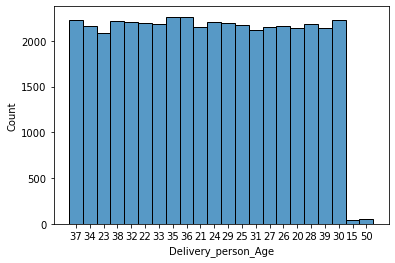

In [85]:
sns.histplot(x='Delivery_person_Age', data=df)

<AxesSubplot:xlabel='Delivery_person_Age', ylabel='count'>

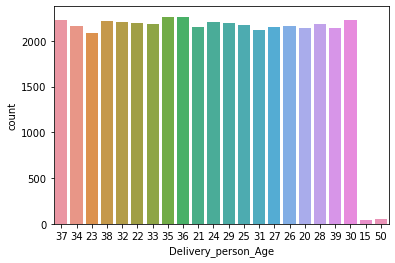

In [87]:
sns.countplot(x='Delivery_person_Age', data=df)

In [90]:
df['Delivery_person_Age'] =df['Delivery_person_Age'].astype(float)

<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Count'>

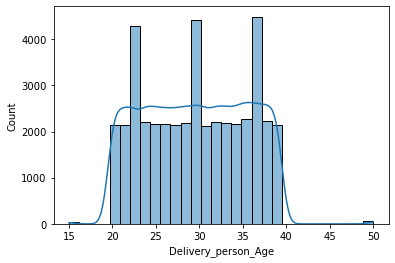

In [99]:
sns.histplot(x='Delivery_person_Age', data=df, bins=30, kde=True)

In [100]:
df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].median(), inplace=True)

In [103]:
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(int)

In [104]:
df.select_dtypes('O').columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Ratings', 'Order_Date',
       'Time_Orderd', 'Time_Order_picked', 'Weatherconditions',
       'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [107]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [108]:
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype(float)

<AxesSubplot:xlabel='Delivery_person_Ratings', ylabel='Count'>

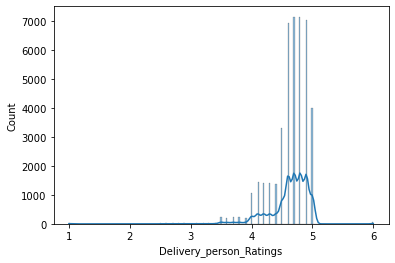

In [110]:
sns.histplot(x='Delivery_person_Ratings', data=df, kde=True)

In [115]:
df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(), inplace=True)

In [116]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [118]:
df['Time_Orderd'].isnull().sum()

1731

In [121]:
df['Time_Orderd'] = df['Time_Orderd'].interpolate(method='time', inplace=True)

In [123]:
df['Time_Orderd']

0        None
1        None
2        None
3        None
4        None
         ... 
45588    None
45589    None
45590    None
45591    None
45592    None
Name: Time_Orderd, Length: 45593, dtype: object